In [1]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

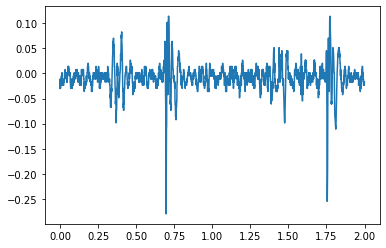

In [2]:
texts = [[], []]

with open("Print_09_v2_PCG_LV.txt", "r") as file:
  textfile = file.readlines()

for text in textfile:
    text = text.split('\t')
    text[1] = text[1].replace('\n',"")
    texts[0].append(float(text[0]))
    texts[1].append(float(text[1]))

plt.plot(texts[0], texts[1])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

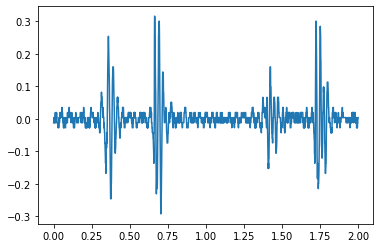

In [3]:
texts = [[], []]

with open("Print_13_v2_PCG_RV.txt", "r") as file:
  textfile = file.readlines()

for text in textfile:
    text = text.split('\t')
    text[1] = text[1].replace('\n',"")
    texts[0].append(float(text[0]))
    texts[1].append(float(text[1]))

plt.plot(texts[0], texts[1])
plt.show

98000


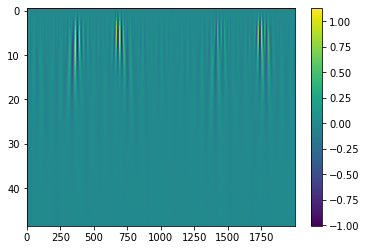

In [21]:
x = texts[0]
y = texts[1]
scale = 50
coef, freqs=pywt.cwt(y,np.arange(1, scale),'mexh')
print(coef.size)
plt.imshow(coef, interpolation="nearest", origin="upper",aspect='auto')
plt.colorbar()
plt.show()
# plt.matshow(coef) # doctest: +SKIP
# plt.show() # doctest: +SKIP

<ipython-input-26-69b9cd6e08de>:13: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


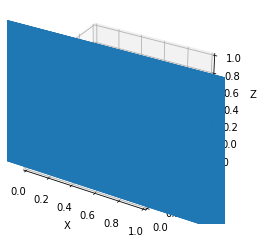

In [26]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter

zs=texts[0]
result = []
for x in range(2000):
    result += [list(zip(np.arange(scale), coef[1,:]))]

poly = PolyCollection(result)
poly.set_alpha(0.7)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.add_collection3d(poly, zs=zs, zdir='y')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

array([-0.00138268, -0.00523358, -0.00698769, ..., -0.00365892,
        0.01078749,  0.01823036])

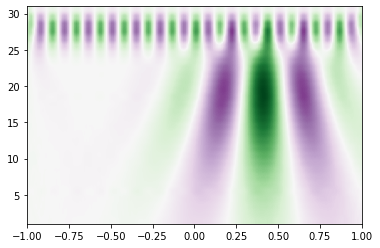

In [4]:
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + np.real(np.exp(-7*(t-0.4)**2)*np.exp(1j*2*np.pi*2*(t-0.4)))
widths = np.arange(1, 31)
cwtmatr, freqs = pywt.cwt(sig, widths, 'mexh')
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())  # doctest: +SKIP
plt.show() # doctest: +SKIP